In [4]:
import os
import pandas as pd

def concat_csvs(directory):
    files = os.listdir(directory)
    csv_files = [f for f in files if f.endswith('.csv')]

    # Extract unique model names from filenames
    model_names = list(set(f.split('_')[0] for f in csv_files))

    result = pd.DataFrame()
    for model in model_names:
        model_files = [f for f in csv_files if f.startswith(model)]

        df_list = []
        for csv_file in model_files:
            df = pd.read_csv(os.path.join(directory, csv_file))
            df['Model'] = model  # Add model name as a column
            df_list.append(df)

        model_df = pd.concat(df_list, ignore_index=True)
        result = pd.concat([result, model_df], ignore_index=True)
    
    return result

# Usage:
directory = 'C:\\Users\\Ray\\Desktop\\MastersResults\\anomaly_detection'  # specify your directory
combined_df = concat_csvs(directory)


In [5]:
# Save the combined dataframe to a CSV file
combined_df.to_csv('anomaly_metrics.csv', index=False)

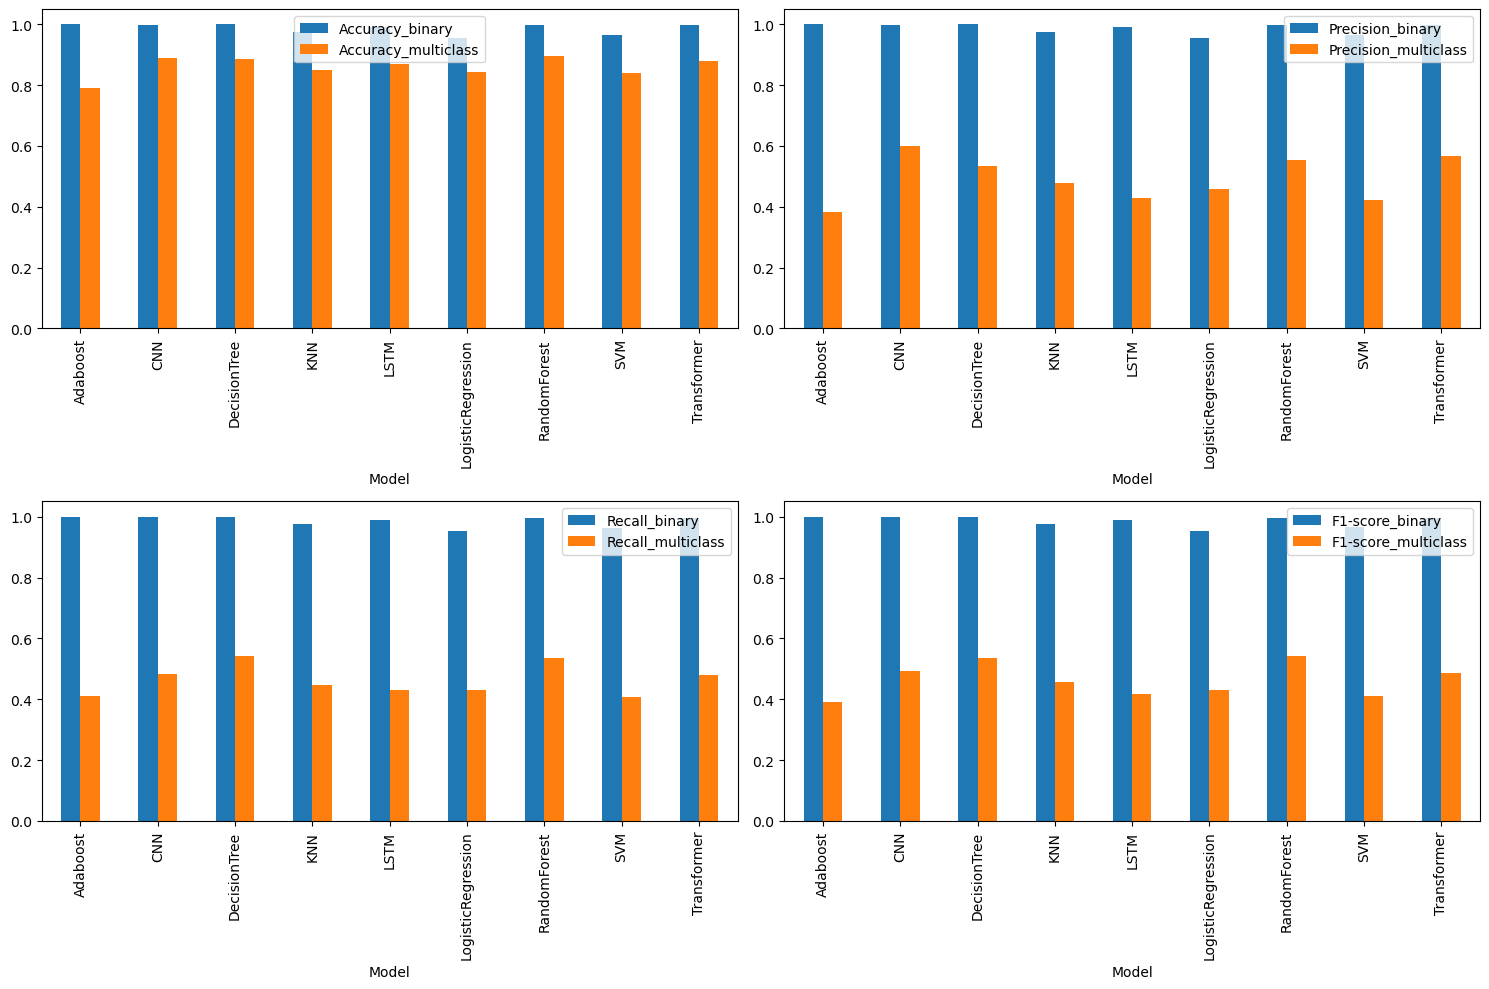

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the binary classification metrics
df_binary = pd.read_csv('anomaly_metrics.csv')

# Pivot the binary classification metrics and select the relevant metrics
df_binary_pivot = df_binary.pivot(index='Model', columns='Metric', values='Value')
df_binary_comparison = df_binary_pivot[['Accuracy', 'Precision (macro)', 'Recall (macro)', 'F1-score (macro)']]
df_binary_comparison = df_binary_comparison.reset_index()
df_binary_comparison.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']

# Define the multiclass classification metrics
data_multiclass = {
    'Model': ['Adaboost', 'CNN', 'DecisionTree', 'KNN', 'LogisticRegression', 'LSTM', 'RandomForest', 'SVM', 'Transformer'],
    'Accuracy': [0.789919, 0.887449, 0.884251, 0.848300, 0.844170, 0.867733, 0.893968, 0.841093, 0.880731],
    'Precision': [0.382420, 0.599081, 0.532708, 0.478837, 0.457225, 0.429443, 0.552543, 0.421600, 0.566279],
    'Recall': [0.411691, 0.482082, 0.540713, 0.447487, 0.430673, 0.430821, 0.535715, 0.405908, 0.478467],
    'F1-score': [0.391747, 0.493471, 0.535532, 0.455455, 0.430320, 0.417632, 0.543087, 0.411477, 0.486240]
}
df_multiclass = pd.DataFrame(data_multiclass)
save_dir = os.getcwd() 
# Merge the binary and multiclass metrics
df_comparison = pd.merge(df_binary_comparison, df_multiclass, on='Model', suffixes=('_binary', '_multiclass'))

# Plot the metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
df_comparison.plot(x='Model', y=['Accuracy_binary', 'Accuracy_multiclass'], kind='bar', ax=axs[0, 0])
df_comparison.plot(x='Model', y=['Precision_binary', 'Precision_multiclass'], kind='bar', ax=axs[0, 1])
df_comparison.plot(x='Model', y=['Recall_binary', 'Recall_multiclass'], kind='bar', ax=axs[1, 0])
df_comparison.plot(x='Model', y=['F1-score_binary', 'F1-score_multiclass'], kind='bar', ax=axs[1, 1])
plt.tight_layout()
plt.savefig(os.path.join(save_dir, f'binary_multi.png'), dpi=300, bbox_inches='tight')
